#### DETECTING FLU EPIDEMICS VIA SEARCH ENGINE QUERY DATA 

Flu epidemics constitute a major public health concern causing respiratory illnesses, hospitalizations, and deaths. According to the National Vital Statistics Reports published in October 2012, influenza ranked as the eighth leading cause of death in 2011 in the United States. Each year, 250,000 to 500,000 deaths are attributed to influenza related diseases throughout the world.

The U.S. Centers for Disease Control and Prevention (CDC) and the European Influenza Surveillance Scheme (EISS) detect influenza activity through virologic and clinical data, including Influenza-like Illness (ILI) physician visits. Reporting national and regional data, however, are published with a 1-2 week lag.

The Google Flu Trends project was initiated to see if faster reporting can be made possible by considering flu-related online search queries -- data that is available almost immediately.

In [8]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import datasets, linear_model, metrics

#import itertools
#import pandas_datareader.data as pdweb
#from pandas_datareader.data import DataReader
#from datetime import datetime
#from io import StringIO

In [9]:
FluTrain = pd.read_csv('../data/FluTrain.csv')
FluTrain[:10]

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436
5,2004-02-08 - 2004-02-14,1.324274,0.207171
6,2004-02-15 - 2004-02-21,1.307257,0.241700
7,2004-02-22 - 2004-02-28,1.036977,0.216467
8,2004-02-29 - 2004-03-06,1.010320,0.225764
9,2004-03-07 - 2004-03-13,1.052492,0.199203


In [10]:
# Which week has the highest visits (ILI)?
FluTrain[FluTrain['ILI']==FluTrain['ILI'].max()]

,Week,ILI,Queries
302,2009-10-18 - 2009-10-24,7.618892,1.0


In [11]:
# Which week has the highest queries?
FluTrain[FluTrain['Queries']==FluTrain['Queries'].max()]

,Week,ILI,Queries
302,2009-10-18 - 2009-10-24,7.618892,1.0


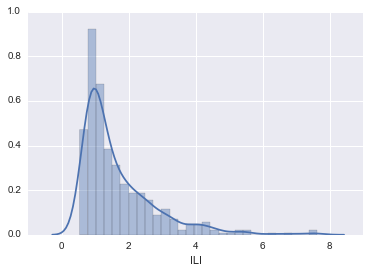

In [12]:
# Plot the histogram of ILI. What best describes the distribution of values of ILI?
sns.distplot(FluTrain['ILI'], bins=29)

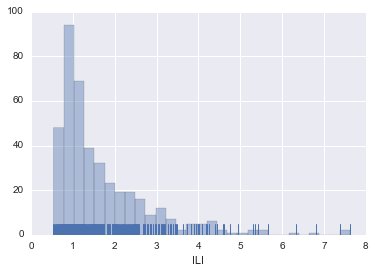

In [13]:
sns.distplot(FluTrain['ILI'], bins=29,kde=False, rug=True)

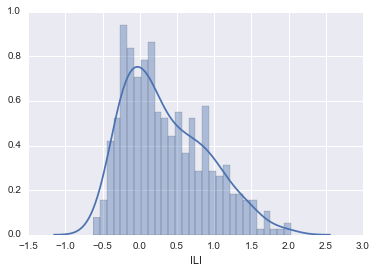

In [14]:
# When data is skewed like that, try log transforming
sns.distplot(np.log(FluTrain['ILI']), bins=29)

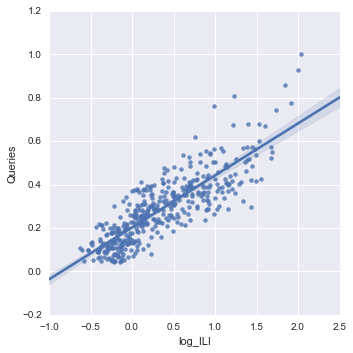

In [15]:
FluTrain['log_ILI'] = np.log(FluTrain['ILI'])
sns.lmplot(x='log_ILI',y='Queries', data=FluTrain)

In [16]:
FluTrend1 = smf.ols(formula='log_ILI ~ Queries',data=FluTrain).fit()
FluTrend1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_ILI   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1011.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):          2.62e-113
Time:                        20:09:26   Log-Likelihood:                -87.974
No. Observations:                 417   AIC:                             179.9
Df Residuals:                     415   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4993      0.030    -16.422      0.000        -0.559    -0.440
Queries        2.9613      0.093     31.800      0.000         2.778     3.144
==============================================================================
Omnibus:                        9.797   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.884
Skew:                           0.373   Prob(JB):                      0.00714
Kurtosis:                       3.112   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# For a single variable linear regression, R-squared = correlation^2 (correlation of dependent and independent variables)

print('R-squared check: ',np.corrcoef(FluTrain['log_ILI'], FluTrain['Queries']).item(1)**2)

R-squared check:  0.7090200553481864


In [18]:
# The csv file FluTest.csv provides the 2012 weekly data of the ILI-related search queries and the observed weekly
# percentage of ILI-related physician visits. Load this data into a data frame called FluTest.
# REMEMBER:  FluTest doesn't have the 'Log_ILI' column

FluTest = pd.read_csv('../data/FluTest.csv')
FluTest['log_ILI'] = np.log(FluTest['ILI'])
print('** length of FluTest is:',len(FluTest))
print()

PredTest1 = np.exp(FluTrend1.predict(FluTest))

print(PredTest1)
print()
print('** length of the prediction is:',len(PredTest1))

** length of FluTest is: 52

[ 3.52033171  2.66268872  2.67318078  2.51016006  2.45162375  2.6942891
  2.78040239  2.67318078  2.37569324  2.35708095  2.18737772  1.7969135
  1.78986074  1.71408354  1.78986074  1.6158945   1.52933261  1.49955462
  1.38068852  1.48780641  1.3752694   1.31704473  1.35913934  1.27625386
  1.31704473  1.23187226  1.27625386  1.33267522  1.25633465  1.27625386
  1.26625508  1.28128281  1.3484912   1.44740777  1.52333008  1.62865414
  1.75500994  2.09477089  2.19599687  2.35708095  2.4228695   2.33861448
  2.32943556  2.53995026  2.44200129  2.85800628  2.75861941  3.69044531
  4.43967921  4.89835095  6.2508877   6.59125245]

** length of the prediction is: 52


In [19]:
#What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012

x = FluTest[FluTest['Week'].str.contains('2012-03-11')==True].index  # now we know we're looking for PredTest1 item 10.
PredTest1.item(x[0])

2.1873777211145455

In [20]:
# What is the relative error betweeen the estimate (our prediction) and the observed value for week of March 11, 2012?
# Relative error is calculated as (Observed ILI - Estimated ILI)/Observed ILI

Observed_ILI = FluTest['ILI'][FluTest['Week'].str.contains('2012-03-11')==True]
print('Observed ILI: ',Observed_ILI.loc[10])
Estimated_ILI = PredTest1.item(x[0])
print('Estimated ILI: ',Estimated_ILI)

print('relative error: ',(Observed_ILI - Estimated_ILI)/Observed_ILI)

Observed ILI:  2.293421558
Estimated ILI:  2.1873777211145455
relative error:  10    0.046238
Name: ILI, dtype: float64


In [21]:
# SSE and RMSE for training set

SSE = sum(FluTrend1.resid**2)
print(SSE)
RMSE = np.sqrt(SSE/len(FluTrain))
print(RMSE)

37.2312064121
0.298803394583


In [22]:
# SSE and RMSE for test set

SSE = sum((PredTest1-FluTest['ILI'])**2)
print('SSE =',SSE)
RMSE = np.sqrt(SSE/len(FluTest))
print('RMSE = ',RMSE)

SSE = 29.1770786196
RMSE =  0.749064527102


In [23]:
### Now train a times series model.  Make a new column: ILILag2
FluTrain['ILILag2']=np.nan
FluTrain[:10]

,Week,ILI,Queries,log_ILI,ILILag2
0,2004-01-04 - 2004-01-10,2.418331,0.237716,0.883078,NaN
1,2004-01-11 - 2004-01-17,1.809056,0.220452,0.592805,NaN
2,2004-01-18 - 2004-01-24,1.712024,0.225764,0.537676,NaN
3,2004-01-25 - 2004-01-31,1.542495,0.237716,0.433401,NaN
4,2004-02-01 - 2004-02-07,1.437868,0.224436,0.363162,NaN
5,2004-02-08 - 2004-02-14,1.324274,0.207171,0.280864,NaN
6,2004-02-15 - 2004-02-21,1.307257,0.241700,0.267931,NaN
7,2004-02-22 - 2004-02-28,1.036977,0.216467,0.036310,NaN
8,2004-02-29 - 2004-03-06,1.010320,0.225764,0.010268,NaN
9,2004-03-07 - 2004-03-13,1.052492,0.199203,0.051161,NaN


In [24]:
for x in range(2,len(FluTrain)):
    FluTrain.ix[x,'ILILag2']=FluTrain['ILI'][x-2]
FluTrain[:10]

,Week,ILI,Queries,log_ILI,ILILag2
0,2004-01-04 - 2004-01-10,2.418331,0.237716,0.883078,NaN
1,2004-01-11 - 2004-01-17,1.809056,0.220452,0.592805,NaN
2,2004-01-18 - 2004-01-24,1.712024,0.225764,0.537676,2.418331
3,2004-01-25 - 2004-01-31,1.542495,0.237716,0.433401,1.809056
4,2004-02-01 - 2004-02-07,1.437868,0.224436,0.363162,1.712024
5,2004-02-08 - 2004-02-14,1.324274,0.207171,0.280864,1.542495
6,2004-02-15 - 2004-02-21,1.307257,0.241700,0.267931,1.437868
7,2004-02-22 - 2004-02-28,1.036977,0.216467,0.036310,1.324274
8,2004-02-29 - 2004-03-06,1.010320,0.225764,0.010268,1.307257
9,2004-03-07 - 2004-03-13,1.052492,0.199203,0.051161,1.036977


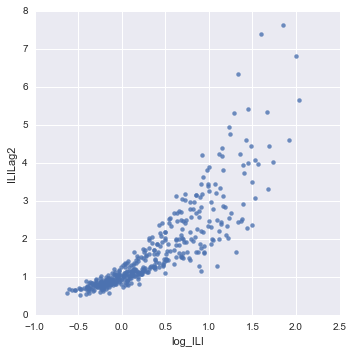

In [25]:
# plot the log of ILILag2 against the log of ILI. What is the relationship between these variables?

sns.lmplot(x='log_ILI',y='ILILag2', data=FluTrain,fit_reg=False)

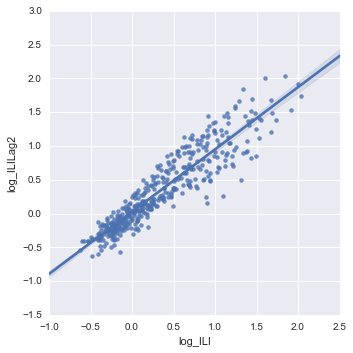

In [26]:
# Try log transforming ILILag2...

FluTrain['log_ILILag2'] = np.log(FluTrain['ILILag2'])
sns.lmplot(x='log_ILI',y='log_ILILag2', data=FluTrain)

In [27]:
FluTrain2 = FluTrain.dropna()
print(len(FluTrain2))
print(len(FluTrain))
FluTrain2[:5]

415
417


,Week,ILI,Queries,log_ILI,ILILag2,log_ILILag2
2,2004-01-18 - 2004-01-24,1.712024,0.225764,0.537676,2.418331,0.883078
3,2004-01-25 - 2004-01-31,1.542495,0.237716,0.433401,1.809056,0.592805
4,2004-02-01 - 2004-02-07,1.437868,0.224436,0.363162,1.712024,0.537676
5,2004-02-08 - 2004-02-14,1.324274,0.207171,0.280864,1.542495,0.433401
6,2004-02-15 - 2004-02-21,1.307257,0.241700,0.267931,1.437868,0.363162


In [28]:
FluTrend2 = smf.ols(formula='log_ILI ~ Queries + log_ILILag2',data=FluTrain2).fit()
FluTrend2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_ILI   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1993.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):          1.38e-212
Time:                        20:09:45   Log-Likelihood:                 147.24
No. Observations:                 415   AIC:                            -288.5
Df Residuals:                     412   BIC:                            -276.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.2406      0.020    -12.321      0.000        -0.279    -0.202
Queries         1.2558      0.079     15.876      0.000         1.100     1.411
log_ILILag2     0.6557      0.023     29.135      0.000         0.611     0.700
==============================================================================
Omnibus:                       74.791   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.402
Skew:                           0.950   Prob(JB):                     2.43e-35
Kurtosis:                       5.368   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Now we must modify FluTest to have the same columns:

FluTest['ILILag2']=np.nan
for x in range(2,len(FluTest)):
    FluTest.ix[x,'ILILag2']=FluTest['ILI'][x-2]
FluTest[:6]

,Week,ILI,Queries,log_ILI,ILILag2
0,2012-01-01 - 2012-01-07,1.766707,0.593625,0.569117,NaN
1,2012-01-08 - 2012-01-14,1.543401,0.499336,0.433988,NaN
2,2012-01-15 - 2012-01-21,1.647615,0.500664,0.499329,1.766707
3,2012-01-22 - 2012-01-28,1.684297,0.479416,0.521348,1.543401
4,2012-01-29 - 2012-02-04,1.863542,0.471448,0.622479,1.647615
5,2012-02-05 - 2012-02-11,1.864079,0.503320,0.622767,1.684297


In [32]:
# Take the last two ILI values from Train and put it in Test (since the split was chronological)

FluTest.ix[0,'ILILag2'] = FluTrain.ix[(len(FluTrain)-2),'ILI']
FluTest.ix[1,'ILILag2'] = FluTrain.ix[(len(FluTrain)-1),'ILI']
FluTest['log_ILILag2'] = np.log(FluTest['ILILag2'])
FluTest[:5]

,Week,ILI,Queries,log_ILI,ILILag2,log_ILILag2
0,2012-01-01 - 2012-01-07,1.766707,0.593625,0.569117,1.852736,0.616663
1,2012-01-08 - 2012-01-14,1.543401,0.499336,0.433988,2.124130,0.753362
2,2012-01-15 - 2012-01-21,1.647615,0.500664,0.499329,1.766707,0.569117
3,2012-01-22 - 2012-01-28,1.684297,0.479416,0.521348,1.543401,0.433988
4,2012-01-29 - 2012-02-04,1.863542,0.471448,0.622479,1.647615,0.499329


In [33]:
PredTest2 = np.exp(FluTrend2.predict(FluTest))

print('** length of FluTest is:',len(FluTest))
print()

print(PredTest2)
print()
print('** length of the prediction is:',len(PredTest2))

** length of FluTest is: 52

[ 2.48223609  2.41182911  2.14094133  1.90781698  1.97150421  2.08185523
  2.25446142  2.21759508  2.22340651  2.27594855  2.19925404  2.02864278
  2.14304551  1.87407834  1.78970606  1.67067225  1.51518736  1.42573209
  1.31535673  1.40518286  1.32591934  1.27509916  1.29916457  1.27901346
  1.20507521  1.12043074  1.11714401  1.15324474  1.10275554  1.02599825
  1.00355003  1.01889821  1.06815075  1.07327643  1.08525771  1.22059186
  1.27490064  1.43785958  1.51712663  1.58716503  1.63843224  1.56279488
  1.67143269  1.7206903   1.73606894  1.96630043  2.04226036  2.42414062
  3.16028257  3.22068038  4.32251275  5.00643775]

** length of the prediction is: 52


In [34]:
# FOR TESTING SET
SSE = sum((PredTest2-FluTest['ILI'])**2)
print(SSE)
RMSE = np.sqrt(SSE/len(FluTest))
print(RMSE)

4.50087659104
0.294202853587
